IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Implement the training logic in the fit method

Implement the prediction logic in the predict method

Implement the plot_histogram method

Implement the calculate_accuracy method

Implement the plot_effective_features method

In [ ]:
class NaiveBayes:

  def fit(self, x_train, y_train):
    self.class_labels = np.unique(y_train)
    self.feature_labels = np.unique(x_train)
    self.class_probabilities = np.zeros(len(self.class_labels))
    self.feature_probabilities = np.zeros((len(self.feature_labels), len(self.class_labels)))

    for i, label in enumerate(self.class_labels):
        class_instances = x_train[y_train == label]
        self.class_probabilities[i] = len(class_instances) / len(x_train)
        
        for j, feature in enumerate(self.feature_labels):
            self.feature_probabilities[j, i] = np.sum(class_instances == feature) / len(class_instances)
  def predict(self, x_test):
    predictions = np.zeros(len(x_test), dtype=int)

    for i, instance in enumerate(x_test):
        instance_probabilities = np.zeros(len(self.class_labels))

        for j, label in enumerate(self.class_labels):
            class_probability = self.class_probabilities[j]

            for k, feature in enumerate(instance):
                feature_probability = self.feature_probabilities[k, j]
                class_probability *= feature_probability

            instance_probabilities[j] = class_probability

        predictions[i] = np.argmax(instance_probabilities)

    return predictions

  def plot_feature_probabilities(self,feature_probabilities, class_labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(feature_probabilities.keys()))
    bar_width = 0.2
    opacity = 0.8

    for i, label in enumerate(class_labels):
        probabilities = []
        for value in feature_probabilities.keys():
            probabilities.append(feature_probabilities[value][label])
        ax.bar(index + i * bar_width, probabilities, bar_width, alpha=opacity, label=label)

    ax.set_xlabel('Features')
    ax.set_ylabel('Probabilities')
    ax.set_title('Feature Probabilities')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(list(feature_probabilities.keys()))
    ax.legend()

    plt.tight_layout()
    plt.show()

    class_labels = ['Age', 'Survived', 'Fare', 'Pclass']

  def calculate_accuracy(self,predictions, y_test):
    correct_predictions = np.sum(predictions == y_test)
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions * 100
    return accuracy
  
  def plot_effective_features(self,effective_features):
    features = list(effective_features.keys())
    scores = list(effective_features.values())

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(features, scores)
    ax.set_xlabel('Features')
    ax.set_ylabel('Score')
    ax.set_title('Feature Effectiveness')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 

READING THE DATA SET

In [ ]:
data = pd.read_csv('/content/train_fsm.csv')
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NOW, DATA PREPROCESSING

In [ ]:
# Drop unnecessary columns
data.drop(["Name", "Ticket", "Cabin", "Embarked","PassengerId","SibSp","Sex"], axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

SPLITTING THE FEATURES AND LABELS INTO TRAIN AND TEST SET

In [ ]:
# Split the dataset into features (x) and output (y)
x = data.drop("Parch", axis=1).values
y = data["Parch"].values

# Normalize the features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

APPLYING NAIVE BAYES AND FIT THE MODEL

In [ ]:
# Assuming you have your training data stored in x_train and y_train
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train)

# Assuming you have your testing data stored in x_test
predictions = naive_bayes.predict(x_test)

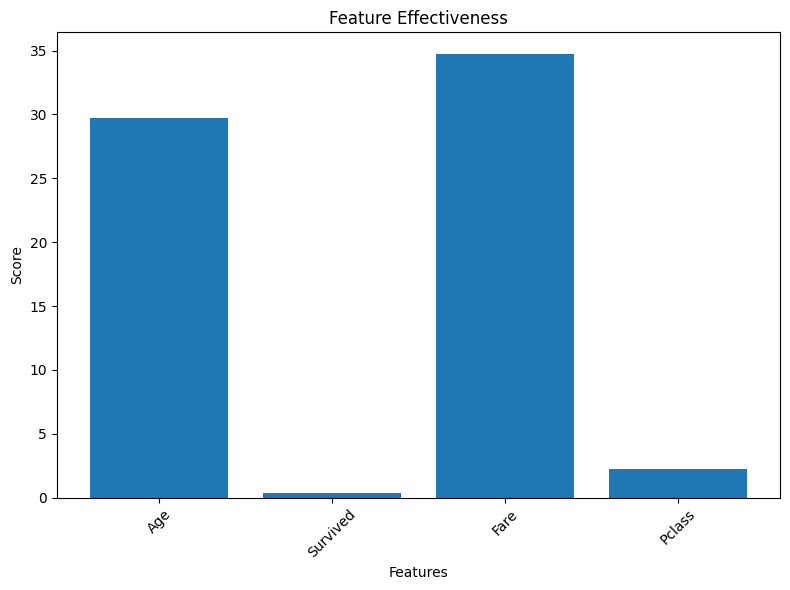

In [ ]:
# Assuming you have the effective features and their scores stored in a dictionary named effective_features
effective_features = {
      'Age': np.mean(data['Age']),
      'Survived': np.mean(data['Survived']),
      'Fare': np.mean(data['Fare']),
      'Pclass': np.mean(data['Pclass'])
    }

# Plot effective features
naive_bayes.plot_effective_features(effective_features)

CALCULATING ACCURACY

Accuracy: 72.72727272727273


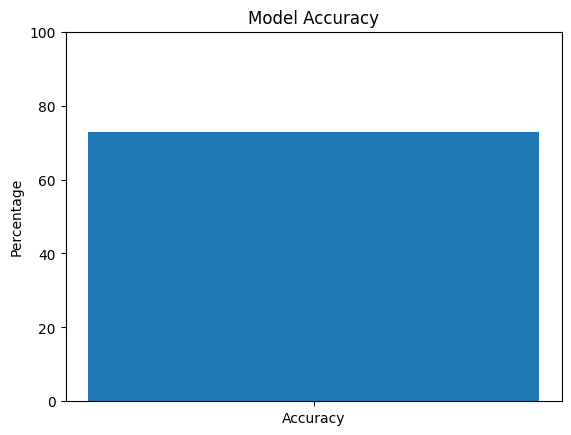

In [ ]:
# Calculate accuracy
accuracy = naive_bayes.calculate_accuracy(predictions,y_test)
print("Accuracy:", accuracy)

# Plot accuracy
labels = ['Accuracy']
values = [accuracy]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Percentage')
ax.set_title('Model Accuracy')
plt.ylim(0, 100)

plt.show()